 # FashionMNIST

 ## Задание 7.2

<img src="https://emiliendupont.github.io/imgs/mnist-chicken/mnist-and-fashion-examples.png">

На практике построим нейронную сеть для классификации картинок. В качестве входных данных используются картинки одежды (в градациях серого, то есть цветовых каналов не 3, а 1). По входной картинке нужно предсказать тип одежды.

In [ ]:
# !pip install torchvision

import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
from torchvision import transforms

Скачаем обучающую и контрольную выборки.

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor()
])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = trainloader.dataset.classes
print(classes)

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Каждая картинка имеет класс от 0 до 9, расшифровка меток класса:  

|class_id|class_name|
|----|----|
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle boot| 

<h2 style="text-align: center;"><b>Задание</b></h2>

Посмотрите на датасет.
* Сколько картинок в train? В test?
* Равномерно ли распределено количество объектов разных классов в train датасете (это можно понять, поработав с полем `train_data` у переменной `trainset`)? в test?
* Выведите несколько картинок с помощью `pyplot`

Используя материалы семинаров по многослойным  и свёрточным сетям, напишите:
1.  Многослойную нейронную сеть MLP (Multi-Layer Perceptron) классифицирующую этот датасет
2. Свёрточную сеть, классифицирующую этот датасет
3. Сравните их качество (по графикам лосса и по Accuracy Score)

Если качество, которое получается у  нейросети, выше 95%, то Вы решили задачу с точностью, которую можно использовать в жизни.

In [ ]:
# 1
print(f'Количество картинок в train: {len(trainset.data)}')
print(f'Количество картинок в test: {len(testset.data)}')

Количество картинок в train: 60000
Количество картинок в test: 10000


In [ ]:
print('Распределение тренировочных данных')
for i, label in enumerate(classes):
    print(f'{label:<12}: {len(trainset.targets[trainset.targets == i])}')

Распределение тренировочных данных
T-shirt/top : 6000
Trouser     : 6000
Pullover    : 6000
Dress       : 6000
Coat        : 6000
Sandal      : 6000
Shirt       : 6000
Sneaker     : 6000
Bag         : 6000
Ankle boot  : 6000


In [ ]:
print('Распределение тестовых данных')
for i, label in enumerate(classes):
    print(f'{label:<12}: {len(testset.targets[testset.targets == i])}')

Распределение тестовых данных
T-shirt/top : 1000
Trouser     : 1000
Pullover    : 1000
Dress       : 1000
Coat        : 1000
Sandal      : 1000
Shirt       : 1000
Sneaker     : 1000
Bag         : 1000
Ankle boot  : 1000


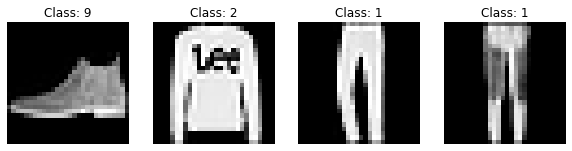

In [ ]:
for imgs, labels in testloader:
    fig, axs = plt.subplots(1, 4, figsize=(10, 4))
    for ax, img, label in zip(axs, imgs, labels):
        ax.imshow(img.view(28, 28), cmap='gray')
        ax.axis('off')
        ax.set_title(f'Class: {label}')
    break
    plt.show()

# Построение нейросети

In [ ]:
import torch.nn as nn
import torch.nn.functional as F  # Functional
from tqdm import notebook

Многослойную нейронную сеть MLP (Multi-Layer Perceptron)

In [ ]:
class MLPNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=1 * 28 * 28, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=84)
        self.fc4 = nn.Linear(in_features=84, out_features=32)
        self.fc5 = nn.Linear(in_features=32, out_features=10)

    def forward(self, x):
        # print(x.shape)
        x = x.view(-1, 1 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

In [ ]:
# объявляем сеть
net = MLPNet()

# выбираем функцию потерь
loss_fn = torch.nn.CrossEntropyLoss()

# выбираем алгоритм оптимизации и learning_rate
learning_rate = 1e-4
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

# итерируемся
mlp_l = []
for epoch in notebook.tqdm(range(5)):

    running_loss = 0.0
    for i, batch in enumerate(notebook.tqdm(trainloader)):
        # так получаем текущий батч
        X_batch, y_batch = batch
        
        # обнуляем веса
        optimizer.zero_grad()

        # forward + backward + optimize
        y_pred = net(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        # выведем текущий loss
        running_loss += loss.item()
        # выведем качество каждые 2000 батчей
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            mlp_l.append(running_loss / 2000)
            running_loss = 0.0

print('Обучение закончено')

[1,  2000] loss: 1.078
[1,  4000] loss: 0.653
[1,  6000] loss: 0.572
[1,  8000] loss: 0.550
[1, 10000] loss: 0.523
[1, 12000] loss: 0.503
[1, 14000] loss: 0.452



[2,  2000] loss: 0.447
[2,  4000] loss: 0.447
[2,  6000] loss: 0.406
[2,  8000] loss: 0.419
[2, 10000] loss: 0.416
[2, 12000] loss: 0.398
[2, 14000] loss: 0.389



[3,  2000] loss: 0.374
[3,  4000] loss: 0.365
[3,  6000] loss: 0.366
[3,  8000] loss: 0.354
[3, 10000] loss: 0.361
[3, 12000] loss: 0.362
[3, 14000] loss: 0.346



[4,  2000] loss: 0.331
[4,  4000] loss: 0.339
[4,  6000] loss: 0.341
[4,  8000] loss: 0.329
[4, 10000] loss: 0.325
[4, 12000] loss: 0.324
[4, 14000] loss: 0.308



[5,  2000] loss: 0.308
[5,  4000] loss: 0.304
[5,  6000] loss: 0.320
[5,  8000] loss: 0.308
[5, 10000] loss: 0.320
[5, 12000] loss: 0.315
[5, 14000] loss: 0.295


Обучение закончено


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        y_pred = net(images)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of T-shirt/top : 82 %
Accuracy of Trouser : 96 %
Accuracy of Pullover : 74 %
Accuracy of Dress : 86 %
Accuracy of  Coat : 80 %
Accuracy of Sandal : 96 %
Accuracy of Shirt : 71 %
Accuracy of Sneaker : 96 %
Accuracy of   Bag : 97 %
Accuracy of Ankle boot : 93 %


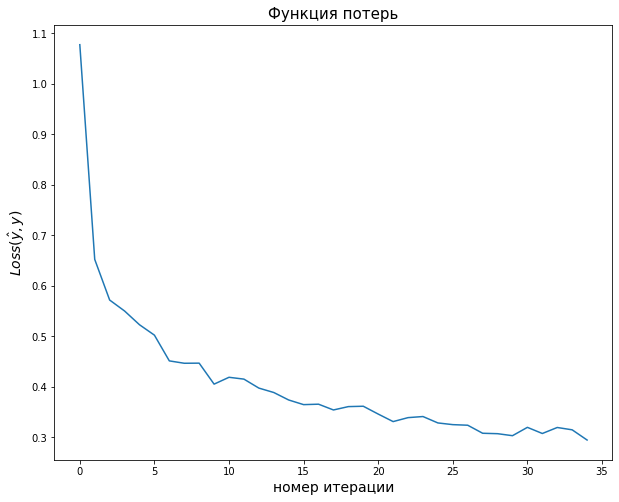

CPU times: user 238 ms, sys: 12.6 ms, total: 250 ms
Wall time: 259 ms


In [ ]:
%%time

plt.figure(figsize=(10, 8))
plt.plot(mlp_l)
plt.title('Функция потерь', fontsize=15)
plt.xlabel('номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

Свёрточная сеть

In [ ]:
class SimpleConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(in_features=4 * 4 * 16, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=84)
        self.fc4 = nn.Linear(in_features=84, out_features=32)
        self.fc5 = nn.Linear(in_features=32, out_features=10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        # x = self.pool(F.relu(self.conv1(x)))
        # x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape)
        x = x.view(-1, 4 * 4 * 16)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

In [ ]:
# объявляем сеть
net = SimpleConvNet()

# Выбираем функцию потерь
loss_fn = torch.nn.CrossEntropyLoss()

# выбираем алгоритм оптимизации и learning_rate
optimizer = torch.optim.Adam(net.parameters(), lr=1e-4)

conv_l = []
for epoch in notebook.tqdm(range(5)):
    running_loss = 0.0
    for i, batch in enumerate(notebook.tqdm(trainloader)):
        # так получаем текущий батч
        X_batch, y_batch = batch
        
        # обнуляем веса
        optimizer.zero_grad()

        # forward + backward + optimize
        y_pred = net(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        
        # выведем текущий loss
        running_loss += loss.item()
        # выведем качество каждые 2000 батчей
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            conv_l.append(running_loss / 2000)
            running_loss = 0.0

print('Обучение закончено')

[1,  2000] loss: 1.310
[1,  4000] loss: 0.899
[1,  6000] loss: 0.797
[1,  8000] loss: 0.736
[1, 10000] loss: 0.706
[1, 12000] loss: 0.657
[1, 14000] loss: 0.632



[2,  2000] loss: 0.600
[2,  4000] loss: 0.588
[2,  6000] loss: 0.560
[2,  8000] loss: 0.544
[2, 10000] loss: 0.537
[2, 12000] loss: 0.524
[2, 14000] loss: 0.523



[3,  2000] loss: 0.495
[3,  4000] loss: 0.489
[3,  6000] loss: 0.490
[3,  8000] loss: 0.484
[3, 10000] loss: 0.475
[3, 12000] loss: 0.469
[3, 14000] loss: 0.459



[4,  2000] loss: 0.441
[4,  4000] loss: 0.453
[4,  6000] loss: 0.423
[4,  8000] loss: 0.428
[4, 10000] loss: 0.425
[4, 12000] loss: 0.420
[4, 14000] loss: 0.419



[5,  2000] loss: 0.396
[5,  4000] loss: 0.381
[5,  6000] loss: 0.398
[5,  8000] loss: 0.396
[5, 10000] loss: 0.392
[5, 12000] loss: 0.386
[5, 14000] loss: 0.375


Обучение закончено


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        y_pred = net(images)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of T-shirt/top : 76 %
Accuracy of Trouser : 97 %
Accuracy of Pullover : 75 %
Accuracy of Dress : 92 %
Accuracy of  Coat : 70 %
Accuracy of Sandal : 95 %
Accuracy of Shirt : 62 %
Accuracy of Sneaker : 96 %
Accuracy of   Bag : 96 %
Accuracy of Ankle boot : 89 %


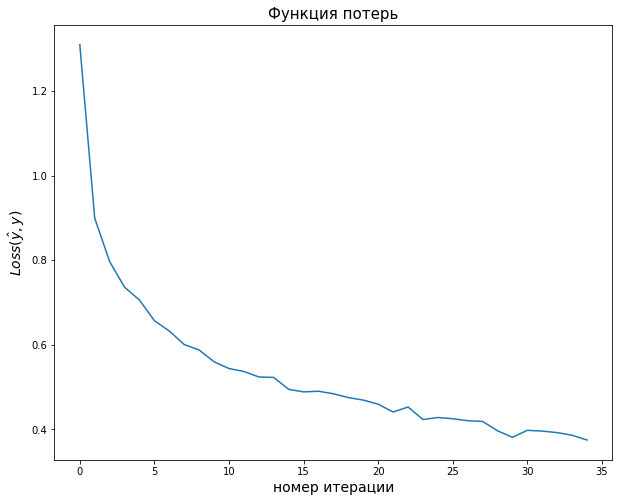

CPU times: user 162 ms, sys: 4.81 ms, total: 167 ms
Wall time: 173 ms


In [ ]:
%%time

plt.figure(figsize=(10, 8))
plt.plot(conv_l)
plt.title('Функция потерь', fontsize=15)
plt.xlabel('номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()